# **RMS Titanic**

O RMS titanic foi um navio de passageiros Britânico, construído em Março de 1909 e lançado ao mar em Maio de 1911. Foi considerado o navio mais sofisticado, luxuoso e seguro de sua época. 
Porém sua fama de "Inafundável", caiu por terra logo em sua viagem inaugural de Southampton com destino a Nova Iorque, em 10 de abril de 1912, 
ao colidir com um Iceberg e naufragar com mais de 1500 pessoas a bordo.
Tornou-se muito famoso, por ser um dos maiores desastres marítimos em tempos de paz de toda história. 
Seu naufrágio destacou vários pontos fracos do projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítima.
Até hoje seus destroços atrai várias expedições de exploração e estudos.
###### *Fonte:* [WikiPedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

--------


### **O Projeto:**
Com base na história do titanic e de um dataset com informações reais sobre uma parte de seus passageiros,
faremos uma análise exploratória com foco nos sobreviventes, para descobrirmos quais classes, genêros e idades tiveram mais chances, 
assim como a relação dessas três variantes para termos uma idéia comparativa com a nossa própria vida.

A principal pergunta a ser respondida por este projeto: *Naquela época quais as chances de eu ter sobrevivido ao naufrágio?*

--------

### **O DataSet:**

O arquivo titanic.data disponibilizado pela equipe da Udacity, contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

--------

##### **Importando o DataSet**
1 - Efetuar a leitura do dataset através do Pandas, gerando um DataFrame de nome tit, levando-se em consideração que o arquivo encontra-se na mesma pasta do notebook.

In [284]:
import numpy as np
import pandas as pd 

In [285]:
file = pd.read_csv('titanic.data')

tit = pd.DataFrame(file)

tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### **Entendendo o DataSet**
1 - Qual a estrutura do dataframe? Quantas colunas e linhas?

In [286]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **Preparando o DataSet**

###### 1 - Excluindo as colunas que não serão úteis para esta análise. (SibSp, Parch, Ticket, Cabin, Embarked).

In [287]:
tit.drop(columns=['SibSp','Parch','Ticket','Cabin','Embarked'], inplace=True)
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


###### 2 - Analisando as colunas que não estão completamente preenchidas e que podem impactar na análise.

In [288]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
dtype: int64

Com o comando acima, encontramos 177 registros sem preenchimento de Idade.                                                                          
Como "Idade" é um atributo importante para as futuras métricas, devemos preencher as lacunas com um valor que não impacte na análise.                    
Pensando em perguntas do tipo: *Qual a faixa de idade de maior sobrevivência?*, não podemos preencher com a média das idades que existem no dataset, pois depois não seria possível separá-los.
Portanto, verificando se não existe nenhum campo menor ou igual a zero, preencheremos os vazios com "0" (Zero).

In [289]:
tit[tit['Age'] <= 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare


Não existe nenhum campo menor ou igual a zero.



In [290]:
# Preenchendo os vazios da coluna Age com "0" 
tit.update(tit['Age'].fillna(0))

Conferindo a quantidade de registros afetados.

In [291]:
tit[tit['Age'] == 0].count()['Age']

177

Analisando novamente as colunas não preenchidas.

In [292]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
dtype: int64

###### 3 - Renomeando as colunas restantes para a lingua portuguesa, utilizando os seguintes nomes de colunas: IdPassageiro, Sobreviveu, Classe, Nome, Sexo, Idade e Tarifa.

In [294]:
tit.rename(
    columns= {'PassengerId' :'IdPassageiro',
              'Survived'    :'Sobreviveu',
              'Pclass'      :'Classe',
              'Name'        :'Nome',
              'Sex'         :'Sexo',
              'Age'         :'Idade',
              'Fare'        :'Tarifa'
              } , inplace = True   
           )

tit.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Tarifa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


###### 4 - Alterando os valores da coluna Sobreviveu para:
- 0 => Não
- 1 => Sim

In [295]:
tit['Sobreviveu'] = tit['Sobreviveu'].map({ 0 : 'Não', 1 : 'Sim'})
tit['Sobreviveu'].unique()

array(['Não', 'Sim'], dtype=object)

###### 5 - Alterando os valores da coluna Sexo para:
- female => Mulher
- male   => Homem

In [296]:
tit['Sexo'] = tit['Sexo'].map({ 'female' : 'Mulher', 'male' : 'Homem'})
tit['Sexo'].unique()

array(['Homem', 'Mulher'], dtype=object)

### **Os Insights:**

Com o DataSet analisado e preparado, podemos elaborar os insights com foco na sobrevivência dos tripulantes.


--------

##### 1 - Importando as Bibliotecas MatPlotLib e SeaBorn, para exibir alguns gráficos. 

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 2 - Representando graficamente a quantidade de sobreviventes e não sobreviventes.

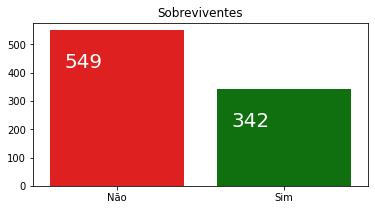

In [298]:
plt.figure(figsize=(6,3))
colors = ['Red','Green']
sns.set_palette(colors)
ax = sns.countplot(x='Sobreviveu', data=tit)
plt.title('Sobreviventes')
plt.ylabel('')
plt.xlabel('')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)
plt.show()

##### 3 - Representando graficamente a quantidade de sobreviventes por sexo.

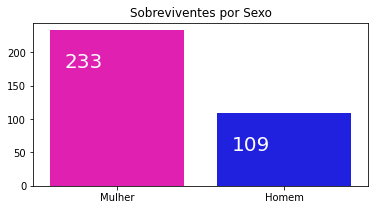

In [299]:
Sobrev_Sexo = tit[tit['Sobreviveu'] == 'Sim']
plt.figure(figsize=(6,3))
colors = ['#FF00C0','Blue']
sns.set_palette(colors)
ax = sns.countplot(x='Sexo', data=Sobrev_Sexo)
plt.title('Sobreviventes por Sexo')
plt.ylabel('')
plt.xlabel('')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)
plt.show()

##### 4 - Representando graficamente a quantidade de sobreviventes por classe.

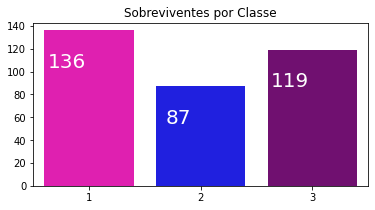

In [300]:
Sobrev_Classe = tit[tit['Sobreviveu'] == 'Sim']
plt.figure(figsize=(6,3))
colors = ['#FF00C0','Blue','Purple']
sns.set_palette(colors)
ax = sns.countplot(x='Classe', data=Sobrev_Classe)
plt.title('Sobreviventes por Classe')
plt.ylabel('')
plt.xlabel('')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)
plt.show()

##### 5 - Representando graficamente a quantidade de sobreviventes por faixa etária.

In [301]:
## Criando uma nova coluna chamada "Faixa_Idade"

tit['Faixa_Idade'] = 'Sem Classificação'
tit.loc[tit['Idade'].between(0.1, 11.99, inclusive=True), 'Faixa_Idade'] = 'Crianças'
tit.loc[tit['Idade'].between(12 , 17.99, inclusive=True), 'Faixa_Idade'] = 'Adolescente'
tit.loc[tit['Idade'].between(18 , 29.99, inclusive=True), 'Faixa_Idade'] = 'Jovem'
tit.loc[tit['Idade'].between(30 , 59.99, inclusive=True), 'Faixa_Idade'] = 'Adulto'
tit.loc[tit['Idade'].between(60 , 200  , inclusive=True), 'Faixa_Idade'] = 'Idoso'
tit['Faixa_Idade'].unique()


array(['Jovem', 'Adulto', 'Sem Classificação', 'Crianças', 'Adolescente',
       'Idoso'], dtype=object)

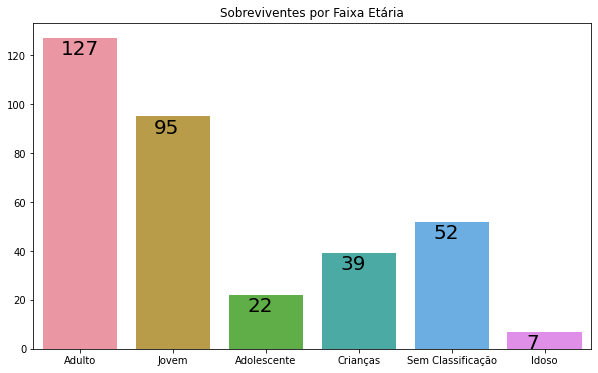

In [302]:
Sobrev_Idade = tit[tit['Sobreviveu'] == 'Sim']
plt.figure(figsize=(10,6))
colors = ['#FF00C0','Blue','Purple']
sns.set_palette(colors)
ax = sns.countplot(x='Faixa_Idade', data=Sobrev_Idade)
plt.title('Sobreviventes por Faixa Etária')
plt.ylabel('')
plt.xlabel('')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center', color='black', size=20)
plt.show()

###### No gráfico acima mostra 52 registros "Sem Classificação" devido a falta das idades no DataSet.
Para os próximos indicadores estaremos desconsiderando estes registros.

Então o total de sobreviventes por Faixa Etária será de:



In [303]:
tit.loc[(tit['Sobreviveu'] == 'Sim') & (tit['Faixa_Idade'] != 'Sem Classificação') ,'Sobreviveu'].count()

290

##### 6 - Exibindo as 5 combinações (Faixa_Idade, Sexo e Classe) que mais sobreviveram.

In [304]:
tit2 = pd.DataFrame( tit.loc[(tit['Sobreviveu'] == 'Sim') & (tit['Faixa_Idade'] != 'Sem Classificação'), 
                             ['Faixa_Idade','Sexo','Classe','Sobreviveu']
                            ].groupby(['Faixa_Idade','Sexo','Classe'],as_index = False).count())

tit2['Percentual'] = round(tit2['Sobreviveu'] / tit2['Sobreviveu'].sum() * 100, 2)

tit2['Percentual'] = pd.Series(["{0:.2f}%".format(val) for val in tit2['Percentual']])

tit2.sort_values('Sobreviveu', ascending=False).head(5).reset_index(drop=True)

,Faixa_Idade,Sexo,Classe,Sobreviveu,Percentual
0,Adulto,Mulher,1,51,17.59%
1,Adulto,Mulher,2,30,10.34%
2,Jovem,Mulher,2,26,8.97%
3,Adulto,Homem,1,25,8.62%
4,Jovem,Mulher,1,21,7.24%


##### 7 - Exibindo as 5 combinações (Faixa_Idade e Sexo) que mais sobreviveram.

In [305]:
tit3 = pd.DataFrame( tit.loc[(tit['Sobreviveu'] == 'Sim') & (tit['Faixa_Idade'] != 'Sem Classificação'), 
                             ['Faixa_Idade','Sexo','Sobreviveu']
                            ].groupby(['Faixa_Idade','Sexo'],as_index = False).count())

tit3['Percentual'] = round(tit3['Sobreviveu'] / tit3['Sobreviveu'].sum() * 100, 2)

tit3['Percentual'] = pd.Series(["{0:.2f}%".format(val) for val in tit3['Percentual']])

tit3.sort_values('Sobreviveu', ascending=False).head(5).reset_index(drop=True)

,Faixa_Idade,Sexo,Sobreviveu,Percentual
0,Adulto,Mulher,88,30.34%
1,Jovem,Mulher,67,23.10%
2,Adulto,Homem,39,13.45%
3,Jovem,Homem,28,9.66%
4,Crianças,Homem,20,6.90%


### **Conclusão:**

Baseando-se nos sobreviventes podemos concluir que:

*   **342 Pessoas sobreviveram** das 891 registradas.
*   **233 Mulheres** - Foram a maioria por gênero.
*   **136 Estavam na Primeira Classe** - Foram a maioria por classe
*   **127 Adultos** - Foram a maioria por faixa etária

Foram desconsiderados das análises que utilizam a faixa etária, **52 registros que não existiam a idade preenchida**. 

Ficando assim **290 Sobreviventes**.

Com base nisso, o percentual de maior sobrevivência considerando o Gênero, Faixa Etária e Classe Social foi:





--------

In [306]:
tit2.sort_values('Sobreviveu', ascending=False).head(1).reset_index(drop=True)

,Faixa_Idade,Sexo,Classe,Sobreviveu,Percentual
0,Adulto,Mulher,1,51,17.59%


### **Pergunta Final:**

#### ***Naquela época quais as chances de eu ter sobrevivido ao naufrágio?***

##### 1 - Criando funções para validações dos Inputs de Sexo, Idade e Classe.

In [307]:
def ValidaSexo(msg):
	ok = False
	valor = 0
	
	while True:
		nr = str(input(msg))

		if nr.isnumeric() and nr in ('1','2'):
			valor = int(nr)
			ok = True
		else:
			print('\033[0;31mErro! Digite 1 ou 2.\033[m')
   
		if ok:
			break
	return valor

def ValidaIdade(msg):
	ok = False
	valor = 0
	
	while True:
		nr = str(input(msg))

		if nr.isnumeric() and int(nr) > 0 :
			valor = int(nr)
			ok = True
		else:
			print('\033[0;31mErro! Digite um número maior que zero.\033[m')
   
		if ok:
			break
	return valor

def ValidaClasse(msg):
	ok = False
	valor = 0
	
	while True:
		nr = str(input(msg))

		if nr.isnumeric() and nr in ('1','2','3'):
			valor = int(nr)
			ok = True
		else:
			print('\033[0;31mErro! Digite 1, 2 ou 3.\033[m')
   
		if ok:
			break
	return valor


##### 2 - Coletando as informações pessoais.

In [308]:
Sexo    = ValidaSexo("Informe seu Sexo: \n    1 --> Homem \n    2 --> Mulher \n")
Idade   = ValidaIdade("\n Informe sua Idade:\n")
Classe  = ValidaClasse("\n Informe sua Classe Social: \n    1 --> Classe Alta   \n    2 --> Classe Média \n    3 --> Classe Baixa \n")

Informe seu Sexo: 
    1 --> Homem 
    2 --> Mulher 
1

 Informe sua Idade:
2

 Informe sua Classe Social: 
    1 --> Classe Alta   
    2 --> Classe Média 
    3 --> Classe Baixa 
3


##### 3 - Tratando os inputs.

In [309]:
if Sexo == 1:
  Sexo = 'Homem'
else:
  Sexo = 'Mulher'

if Idade > 0 and Idade < 12:
  Idade = 'Crianças'
elif Idade >= 12 and Idade < 18:
  Idade = 'Adolescente'
elif Idade >= 18 and Idade < 30:
  Idade = 'Jovem'
elif Idade >= 30 and Idade < 60:
  Idade = 'Adulto'
else:
  Idade = 'Idoso'


##### 4 - Respondendo a pergunta.

In [310]:
if  tit2.loc[(tit2['Sexo'] == Sexo) & (tit2['Faixa_Idade'] == Idade) & (tit2['Classe'] == Classe),:].empty :
    print('---------------------------------------------------------------------------------------------------------------------')
    print('Sem Sobreviventes pelo Tipo de Classe --> ' + str(Classe) + ', Sexo --> ' + Sexo + ' e Faixa Etária --> ' + str(Idade))
    print('---------------------------------------------------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------------------------------------------------')
    print('Pelo Sexo --> ' + Sexo + ' e Faixa Etária --> ' + str(Idade) + ', o percentual de sobrevivência seria de ' 
          +str(tit3.loc[(tit3['Sexo'] == Sexo) & (tit3['Faixa_Idade'] == Idade),'Percentual'].to_list()))   
    print('---------------------------------------------------------------------------------------------------------------------')

else:
    print('---------------------------------------------------------------------------------------------------------------------')
    print('Pelo Tipo de Classe --> ' + str(Classe) + ', Sexo --> ' + Sexo + ' e Faixa Etária --> ' + str(Idade) + 
          ', o percentual de sobrevivência seria de ' 
          +str(tit2.loc[(tit2['Sexo'] == Sexo) & (tit2['Faixa_Idade'] == Idade) & (tit2['Classe'] == Classe),'Percentual'].to_list()))   
    print('---------------------------------------------------------------------------------------------------------------------')


---------------------------------------------------------------------------------------------------------------------
Pelo Tipo de Classe --> 3, Sexo --> Homem e Faixa Etária --> Crianças, o percentual de sobrevivência seria de ['2.76%']
---------------------------------------------------------------------------------------------------------------------
